## Linear Regression

-numpy is the fundamental package for working with matrices in Python.              
-matplotlib is a famous library to plot graphs in Python.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

- `x_train` is the population of a city
- `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
- Both `X_train` and `y_train` are numpy arrays.

In [17]:
# load the dataset
x_train = np.array([6.1101, 5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,  8.5781,  6.4862,
                    5.0546,  5.7107, 14.164,   5.734, 8.4084,  5.6407,  5.3794,  6.3654,  5.1301,
                    6.4296, 7.0708,  6.1891, 20.27, 5.4901,  6.3261,  5.5649, 18.945,  12.828,
                    10.957,  13.176,  22.203, 5.2524, 6.5894,  9.2482,  5.8918,  8.2111,  7.9334,
                    8.0959,  5.6063, 12.836,  6.3534,  5.4069,  6.8825, 11.708,   5.7737,  7.8247,
                    7.0931,  5.0702,  5.8014, 11.7,   5.5416,  7.5402,  5.3077,  7.423, 7.6031,
                    6.3328,  6.3589,  6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279,
                    14.908,  18.959,   7.2182,  8.2951, 10.236,   5.4994, 20.341,  10.136,   7.3345,
                    6.0062,  7.2259,  5.0269,  6.5479, 7.5386,  5.0365, 10.274,   5.1077,  5.7292,
                    5.1884,  6.3557,  9.7687, 6.5159,  8.5172, 9.1802,  6.002,   5.5204,  5.0594,
                    5.7077,  7.6366,  5.8707, 5.3054, 8.2934, 13.394,   5.4369])

y_train = np.array([17.592,    9.1302,  13.662,   11.854,    6.8233,  11.886,    4.3483,  12.,
                    6.5987,   3.8166,   3.2522,  15.505,    3.1551,   7.2258,   0.71618,  3.5129,
                    5.3048,   0.56077,  3.6518,   5.3893,   3.1386,  21.767,    4.263,    5.1875,
                    3.0825,  22.638,   13.501,    7.0467,  14.692,   24.147,   -1.22,     5.9966,
                    12.134,   1.8495,   6.5426,   4.5623,   4.1164,   3.3928,  10.117,    5.4974,
                    0.55657,  3.9115,   5.3854,   2.4406,   6.7318,   1.0463,   5.1337,   1.844,
                    8.0043,  1.0179,  6.7504,   1.8396,   4.2885,   4.9981,   1.4233,  -1.4211,
                    2.4756,   4.6042,   3.9624,   5.4141,   5.1694,  -0.74279, 17.929,  12.054,
                    17.054,    4.8852,   5.7442,   7.7754,   1.0173,  20.992,    6.6799,   4.0259,
                    1.2784,   3.3411,  -2.6807,   0.29678,  3.8845,   5.7014,   6.7526,   2.0576,
                    0.47953,  0.20421,  0.67861,  7.5435,   5.3436,   4.2415,   6.7981,   0.92695,
                    0.152,    2.8214,   1.8451,   4.2959,   7.2029,   1.9869,   0.14454,  9.0551,
                    0.61705])


The code below prints the variable `x_train` and the type of the variable.

In [18]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
Now, let's print `y_train`

In [19]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represents restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Visualize data

It is often useful to understand the data by visualizing it. 
- For this dataset has only two properties to plot (profit and population). 

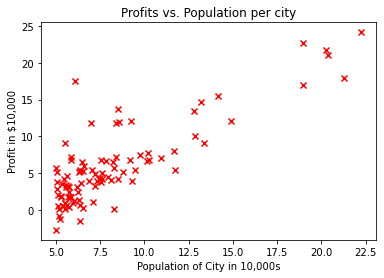

In [20]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

## Linear regression

Fit the linear regression parameters $(w,b)$ to dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$

<a name="5"></a>
## Compute Cost

Gradient descent involves repeated steps to adjust the value of parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful to monitor the progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- Implement a function to calculate $J(w,b)$ so as to check the progress of gradient descent implementation.

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- $f_{w,b}(x^{(i)})$ is the model's prediction of profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator


In [21]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    for i in range(m):
        f_wb_i = w*x[i] + b
        cost_i = (f_wb_i - y[i])**2
        total_cost = total_cost + cost_i
    total_cost = total_cost/(2*m)
    return total_cost

In [22]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


## Gradient descent 
The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


`compute_gradient` calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [23]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb_i = w*x[i] + b
        dj_dw = dj_dw + (f_wb_i - y[i])*x[i]
        dj_db = dj_db + (f_wb_i - y[i])
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [24]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32880995535055 -5.83913505154639


In [25]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w:', tmp_dj_dw, tmp_dj_db)

Gradient at test w: -47.41609079755671 -4.007176907216494


In [26]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [27]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362474623772 -3.6302819888845543


In [28]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

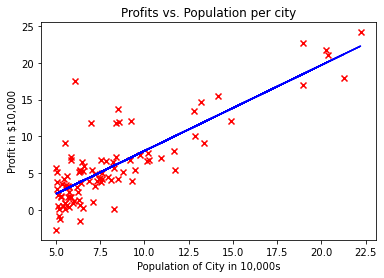

In [29]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [30]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.87
For population = 70,000, we predict a profit of $45342.55
